In [887]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from matplotlib import pyplot
import math
import numpy as np
from sklearn import preprocessing 
import torch.optim as optim
import torch.nn as neu

In [888]:
DS = pd.read_csv("C:\\Users\\dhruv\\Downloads\\Housing.csv")

In [889]:
train=DS.sample(frac=0.8,random_state=0) 
test=DS.drop(train.index)

In [890]:
DS

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [891]:
train = train[['price','area','bedrooms','bathrooms','stories','parking']]
test = test[['price','area','bedrooms','bathrooms','stories','parking']]

In [892]:
scaler = preprocessing.MinMaxScaler()

In [893]:
X1_t = np.array(train.area)
X2_t = np.array(train.bedrooms)
X3_t = np.array(train.bathrooms)
X4_t = np.array(train.stories)
X5_t = np.array(train.parking)

X0_t= np.ones(436)

X = np.vstack([X0_t,X1_t,X2_t,X3_t,X4_t,X5_t])
X = X.T
X = np.array(X)   
x = scaler.fit_transform(X)
X= x
X

array([[0.        , 0.16151203, 0.4       , 0.        , 0.33333333,
        0.33333333],
       [0.        , 0.54776632, 0.4       , 0.        , 0.        ,
        0.66666667],
       [0.        , 0.12439863, 0.6       , 0.        , 0.33333333,
        0.        ],
       ...,
       [0.        , 0.13402062, 0.4       , 0.        , 0.33333333,
        0.33333333],
       [0.        , 0.08247423, 0.4       , 0.33333333, 0.33333333,
        0.        ],
       [0.        , 0.21649485, 0.4       , 0.        , 0.        ,
        0.        ]])

In [894]:
Y_t = np.array(train.price)
Y = Y_t
Y = Y_t.reshape(436,1)
y = scaler.fit_transform(Y)
Y=y

In [895]:
#weights and bias column
theta = np.array([0., 0., 0., 0., 0., 0.])
theta = theta.reshape(6,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [896]:
#Data Array
t_c = Y #PRICE(Actual Y's or Data(price))
t_u = X #Epochs(Actual X's ...multidimentional)

In [897]:
t_c = torch.tensor(t_c, dtype=torch.float64)#.to_numpy()
t_u = torch.tensor(t_u, dtype=torch.float64)

In [898]:
t_c= np.array(t_c)
t_u= np.array(t_u)
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [899]:
#Weights and Bias as column
b = torch.zeros(1)
w5 = torch.ones(1)
w4 = torch.ones(1)
w3 = torch.ones(1)
w2 = torch.ones(1)
w1 = torch.ones(1)

In [900]:
theta = [b, w1,w2, w3, w4, w5]
theta = torch.tensor(theta).reshape(6,1)

In [901]:
#Model definition linear
def model(X, theta):
    return np.matmul(X, theta)

In [902]:
#Loss function
def loss_func(t_p, t_c):
    var = (t_p - t_c)**2
    return var.mean()

In [903]:
t_p = model(X, theta)
#t_p = torch.tensor(t_p)

In [904]:
loss = loss_func(t_p, t_c)
loss

tensor(1.1408, dtype=torch.float64)

In [905]:
def b_del(delta):
    b_del = [delta, 0,0,0,0,0]
    b_del = torch.tensor(b_del).reshape(6,1)
    return b_del
def w5_del(delta):
    b_del = [0, delta,0,0,0,0]
    b_del = torch.tensor(b_del).reshape(6,1)
    return b_del
def w4_del(delta):
    b_del = [0, 0,delta,0,0,0]
    b_del = torch.tensor(b_del).reshape(6,1)
    return b_del
def w3_del(delta):
    b_del = [0, 0,0,delta,0,0]
    b_del = torch.tensor(b_del).reshape(6,1)
    return b_del
def w2_del(delta):
    b_del = [0, 0,0,0,delta,0]
    b_del = torch.tensor(b_del).reshape(6,1)
    return b_del
def w1_del(delta):
    b_del = [0, 0,0,0,0,delta]
    b_del = torch.tensor(b_del).reshape(6,1)
    return b_del

In [906]:
delta = 0.7

loss_rate_of_change_b = (loss_func(model(t_u, theta+b_del(delta)), t_c) - 
loss_func(model(t_u, theta-b_del(delta)), t_c))/(2.0 * delta)

loss_rate_of_change_w1 = (loss_func(model(t_u, theta+w1_del(delta)), t_c) - 
loss_func(model(t_u, theta-w1_del(delta)), t_c))/(2.0 * delta)

loss_rate_of_change_w2 = (loss_func(model(t_u, theta+w2_del(delta)), t_c) - 
loss_func(model(t_u, theta-w2_del(delta)), t_c))/(2.0 * delta)

loss_rate_of_change_w3 = (loss_func(model(t_u, theta+w3_del(delta)), t_c) - 
loss_func(model(t_u, theta-w3_del(delta)), t_c))/(2.0 * delta)

loss_rate_of_change_w4 = (loss_func(model(t_u, theta+w4_del(delta)), t_c) - 
loss_func(model(t_u, theta-w4_del(delta)), t_c))/(2.0 * delta)

loss_rate_of_change_w5 = (loss_func(model(t_u, theta+w5_del(delta)), t_c) - 
loss_func(model(t_u, theta-w5_del(delta)), t_c))/(2.0 * delta)


In [907]:
learning_rate = 1e-2
w1 = w1 - learning_rate * loss_rate_of_change_w1
w2 = w2 - learning_rate * loss_rate_of_change_w2
w3 = w3 - learning_rate * loss_rate_of_change_w3
w4 = w4 - learning_rate * loss_rate_of_change_w4
w5 = w5 - learning_rate * loss_rate_of_change_w5
b = b - learning_rate * loss_rate_of_change_b

In [908]:
#Partial deriv of loss function 
def dloss_fn(t_p, t_c):
    dsq_diffs=2* (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [909]:
#dm/dw5
def dmodel_dw5(t_u, w5, w4, w3, w2, w1, b):
    return t_u

In [910]:
#dm/dw4
def dmodel_dw4(t_u, w5, w4, w3, w2, w1, b):
    return t_u

In [911]:
#dm/dw3
def dmodel_dw3(t_u, w5, w4, w3, w2, w1, b):
    return t_u

In [912]:
#dm/dw2
def dmodel_dw2(t_u, w5, w4, w3, w2, w1, b):
    return t_u

In [913]:
#dm/dw1
def dmodel_dw1(t_u, w5, w4, w3, w2, w1, b):
    return t_u

In [914]:
#dm/db
def dmodel_db(t_u, w5, w4, w3, w2, w1, b):
    return 1.0

In [915]:
def grad_fn(t_u, t_c, t_p, w5, w4, w3, w2, w1, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw5 = dloss_dtp * dmodel_dw2(t_u, w5, w4, w3, w2, w1, b)
    dloss_dw4 = dloss_dtp * dmodel_dw1(t_u, w5, w4, w3, w2, w1, b)
    dloss_dw3 = dloss_dtp * dmodel_db(t_u, w5, w4, w3, w2, w1, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w5, w4, w3, w2, w1, b)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w5, w4, w3, w2, w1, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w5, w4, w3, w2, w1, b)
    return torch.stack([dloss_dw5.sum(), dloss_dw4.sum(), dloss_dw3.sum(), dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])


In [916]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w5, w4, w3, w2, w1, b = params
        theta = [b, w1,w2, w3, w4, w5]
        theta = torch.tensor(theta).reshape(6,1)
        t_p = model(t_u, theta)
        loss = loss_func(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w5, w4, w3, w2, w1, b)
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        print('Params: %f', params)
        print("Grad: %f", grad)
        print('-------------------------------------------------')
    return params

In [917]:
#In this part I was getting na numbers...I HAD to reduce the learning rate to that level......
#rest of the training for LR=0.1,0.01,0.001,0.0001 is done in the following sub-parts of the HW like Problem 1.1,1.2,etc.
training_loop(
n_epochs = 500,
learning_rate = 1e-4,
params = torch.tensor([1,1,1,0.5, 0.1, 0.5]),
t_u = t_u,
t_c = t_c)

Epoch 1, Loss 0.454918
Params: %f tensor([0.9998, 0.9998, 0.9999, 0.4998, 0.0998, 0.4999], dtype=torch.float64)
Grad: %f tensor([1.7521, 1.7521, 1.0286, 1.7521, 1.7521, 1.0286], dtype=torch.float64)
-------------------------------------------------
Epoch 2, Loss 0.454624
Params: %f tensor([0.9996, 0.9996, 0.9998, 0.4996, 0.0996, 0.4998], dtype=torch.float64)
Grad: %f tensor([1.7515, 1.7515, 1.0282, 1.7515, 1.7515, 1.0282], dtype=torch.float64)
-------------------------------------------------
Epoch 3, Loss 0.454331
Params: %f tensor([0.9995, 0.9995, 0.9997, 0.4995, 0.0995, 0.4997], dtype=torch.float64)
Grad: %f tensor([1.7509, 1.7509, 1.0278, 1.7509, 1.7509, 1.0278], dtype=torch.float64)
-------------------------------------------------
Epoch 4, Loss 0.454038
Params: %f tensor([0.9993, 0.9993, 0.9996, 0.4993, 0.0993, 0.4996], dtype=torch.float64)
Grad: %f tensor([1.7502, 1.7502, 1.0274, 1.7502, 1.7502, 1.0274], dtype=torch.float64)
-------------------------------------------------
Epoc

-------------------------------------------------
Epoch 61, Loss 0.437678
Params: %f tensor([0.9894, 0.9894, 0.9938, 0.4894, 0.0894, 0.4938], dtype=torch.float64)
Grad: %f tensor([1.7145, 1.7145, 1.0041, 1.7145, 1.7145, 1.0041], dtype=torch.float64)
-------------------------------------------------
Epoch 62, Loss 0.437397
Params: %f tensor([0.9893, 0.9893, 0.9937, 0.4893, 0.0893, 0.4937], dtype=torch.float64)
Grad: %f tensor([1.7138, 1.7138, 1.0037, 1.7138, 1.7138, 1.0037], dtype=torch.float64)
-------------------------------------------------
Epoch 63, Loss 0.437116
Params: %f tensor([0.9891, 0.9891, 0.9936, 0.4891, 0.0891, 0.4936], dtype=torch.float64)
Grad: %f tensor([1.7132, 1.7132, 1.0033, 1.7132, 1.7132, 1.0033], dtype=torch.float64)
-------------------------------------------------
Epoch 64, Loss 0.436836
Params: %f tensor([0.9889, 0.9889, 0.9935, 0.4889, 0.0889, 0.4935], dtype=torch.float64)
Grad: %f tensor([1.7126, 1.7126, 1.0029, 1.7126, 1.7126, 1.0029], dtype=torch.float64)


Epoch 121, Loss 0.421176
Params: %f tensor([0.9793, 0.9793, 0.9878, 0.4793, 0.0793, 0.4878], dtype=torch.float64)
Grad: %f tensor([1.6776, 1.6776, 0.9802, 1.6776, 1.6776, 0.9802], dtype=torch.float64)
-------------------------------------------------
Epoch 122, Loss 0.420907
Params: %f tensor([0.9791, 0.9791, 0.9878, 0.4791, 0.0791, 0.4878], dtype=torch.float64)
Grad: %f tensor([1.6770, 1.6770, 0.9798, 1.6770, 1.6770, 0.9798], dtype=torch.float64)
-------------------------------------------------
Epoch 123, Loss 0.420638
Params: %f tensor([0.9789, 0.9789, 0.9877, 0.4789, 0.0789, 0.4877], dtype=torch.float64)
Grad: %f tensor([1.6764, 1.6764, 0.9794, 1.6764, 1.6764, 0.9794], dtype=torch.float64)
-------------------------------------------------
Epoch 124, Loss 0.420369
Params: %f tensor([0.9788, 0.9788, 0.9876, 0.4788, 0.0788, 0.4876], dtype=torch.float64)
Grad: %f tensor([1.6758, 1.6758, 0.9790, 1.6758, 1.6758, 0.9790], dtype=torch.float64)
----------------------------------------------

Epoch 188, Loss 0.403581
Params: %f tensor([0.9682, 0.9682, 0.9814, 0.4682, 0.0682, 0.4814], dtype=torch.float64)
Grad: %f tensor([1.6374, 1.6374, 0.9540, 1.6374, 1.6374, 0.9540], dtype=torch.float64)
-------------------------------------------------
Epoch 189, Loss 0.403325
Params: %f tensor([0.9680, 0.9680, 0.9813, 0.4680, 0.0680, 0.4813], dtype=torch.float64)
Grad: %f tensor([1.6368, 1.6368, 0.9537, 1.6368, 1.6368, 0.9537], dtype=torch.float64)
-------------------------------------------------
Epoch 190, Loss 0.403069
Params: %f tensor([0.9678, 0.9678, 0.9812, 0.4678, 0.0678, 0.4812], dtype=torch.float64)
Grad: %f tensor([1.6362, 1.6362, 0.9533, 1.6362, 1.6362, 0.9533], dtype=torch.float64)
-------------------------------------------------
Epoch 191, Loss 0.402813
Params: %f tensor([0.9677, 0.9677, 0.9811, 0.4677, 0.0677, 0.4811], dtype=torch.float64)
Grad: %f tensor([1.6356, 1.6356, 0.9529, 1.6356, 1.6356, 0.9529], dtype=torch.float64)
----------------------------------------------

Params: %f tensor([0.9584, 0.9584, 0.9757, 0.4584, 0.0584, 0.4757], dtype=torch.float64)
Grad: %f tensor([1.6022, 1.6022, 0.9312, 1.6022, 1.6022, 0.9312], dtype=torch.float64)
-------------------------------------------------
Epoch 249, Loss 0.388292
Params: %f tensor([0.9583, 0.9583, 0.9756, 0.4583, 0.0583, 0.4756], dtype=torch.float64)
Grad: %f tensor([1.6017, 1.6017, 0.9308, 1.6017, 1.6017, 0.9308], dtype=torch.float64)
-------------------------------------------------
Epoch 250, Loss 0.388047
Params: %f tensor([0.9581, 0.9581, 0.9755, 0.4581, 0.0581, 0.4755], dtype=torch.float64)
Grad: %f tensor([1.6011, 1.6011, 0.9304, 1.6011, 1.6011, 0.9304], dtype=torch.float64)
-------------------------------------------------
Epoch 251, Loss 0.387802
Params: %f tensor([0.9580, 0.9580, 0.9754, 0.4580, 0.0580, 0.4754], dtype=torch.float64)
Grad: %f tensor([1.6005, 1.6005, 0.9301, 1.6005, 1.6005, 0.9301], dtype=torch.float64)
-------------------------------------------------
Epoch 252, Loss 0.387

Params: %f tensor([0.9486, 0.9486, 0.9700, 0.4486, 0.0486, 0.4700], dtype=torch.float64)
Grad: %f tensor([1.5667, 1.5667, 0.9081, 1.5667, 1.5667, 0.9081], dtype=torch.float64)
-------------------------------------------------
Epoch 311, Loss 0.373434
Params: %f tensor([0.9485, 0.9485, 0.9699, 0.4485, 0.0485, 0.4699], dtype=torch.float64)
Grad: %f tensor([1.5661, 1.5661, 0.9077, 1.5661, 1.5661, 0.9077], dtype=torch.float64)
-------------------------------------------------
Epoch 312, Loss 0.373199
Params: %f tensor([0.9483, 0.9483, 0.9698, 0.4483, 0.0483, 0.4698], dtype=torch.float64)
Grad: %f tensor([1.5655, 1.5655, 0.9073, 1.5655, 1.5655, 0.9073], dtype=torch.float64)
-------------------------------------------------
Epoch 313, Loss 0.372965
Params: %f tensor([0.9481, 0.9481, 0.9697, 0.4481, 0.0481, 0.4697], dtype=torch.float64)
Grad: %f tensor([1.5650, 1.5650, 0.9070, 1.5650, 1.5650, 0.9070], dtype=torch.float64)
-------------------------------------------------
Epoch 314, Loss 0.372

Grad: %f tensor([1.5347, 1.5347, 0.8873, 1.5347, 1.5347, 0.8873], dtype=torch.float64)
-------------------------------------------------
Epoch 368, Loss 0.360353
Params: %f tensor([0.9396, 0.9396, 0.9648, 0.4396, 0.0396, 0.4648], dtype=torch.float64)
Grad: %f tensor([1.5341, 1.5341, 0.8869, 1.5341, 1.5341, 0.8869], dtype=torch.float64)
-------------------------------------------------
Epoch 369, Loss 0.360129
Params: %f tensor([0.9395, 0.9395, 0.9647, 0.4395, 0.0395, 0.4647], dtype=torch.float64)
Grad: %f tensor([1.5336, 1.5336, 0.8866, 1.5336, 1.5336, 0.8866], dtype=torch.float64)
-------------------------------------------------
Epoch 370, Loss 0.359904
Params: %f tensor([0.9393, 0.9393, 0.9646, 0.4393, 0.0393, 0.4646], dtype=torch.float64)
Grad: %f tensor([1.5330, 1.5330, 0.8862, 1.5330, 1.5330, 0.8862], dtype=torch.float64)
-------------------------------------------------
Epoch 371, Loss 0.359680
Params: %f tensor([0.9392, 0.9392, 0.9645, 0.4392, 0.0392, 0.4645], dtype=torch.float

Params: %f tensor([0.9310, 0.9310, 0.9598, 0.4310, 0.0310, 0.4598], dtype=torch.float64)
Grad: %f tensor([1.5028, 1.5028, 0.8666, 1.5028, 1.5028, 0.8666], dtype=torch.float64)
-------------------------------------------------
Epoch 426, Loss 0.347589
Params: %f tensor([0.9308, 0.9308, 0.9597, 0.4308, 0.0308, 0.4597], dtype=torch.float64)
Grad: %f tensor([1.5023, 1.5023, 0.8662, 1.5023, 1.5023, 0.8662], dtype=torch.float64)
-------------------------------------------------
Epoch 427, Loss 0.347374
Params: %f tensor([0.9307, 0.9307, 0.9596, 0.4307, 0.0307, 0.4596], dtype=torch.float64)
Grad: %f tensor([1.5017, 1.5017, 0.8659, 1.5017, 1.5017, 0.8659], dtype=torch.float64)
-------------------------------------------------
Epoch 428, Loss 0.347159
Params: %f tensor([0.9305, 0.9305, 0.9596, 0.4305, 0.0305, 0.4596], dtype=torch.float64)
Grad: %f tensor([1.5012, 1.5012, 0.8655, 1.5012, 1.5012, 0.8655], dtype=torch.float64)
-------------------------------------------------
Epoch 429, Loss 0.346

Grad: %f tensor([1.4732, 1.4732, 0.8473, 1.4732, 1.4732, 0.8473], dtype=torch.float64)
-------------------------------------------------
Epoch 481, Loss 0.335974
Params: %f tensor([0.9226, 0.9226, 0.9550, 0.4226, 0.0226, 0.4550], dtype=torch.float64)
Grad: %f tensor([1.4727, 1.4727, 0.8470, 1.4727, 1.4727, 0.8470], dtype=torch.float64)
-------------------------------------------------
Epoch 482, Loss 0.335767
Params: %f tensor([0.9225, 0.9225, 0.9549, 0.4225, 0.0225, 0.4549], dtype=torch.float64)
Grad: %f tensor([1.4721, 1.4721, 0.8466, 1.4721, 1.4721, 0.8466], dtype=torch.float64)
-------------------------------------------------
Epoch 483, Loss 0.335561
Params: %f tensor([0.9223, 0.9223, 0.9548, 0.4223, 0.0223, 0.4548], dtype=torch.float64)
Grad: %f tensor([1.4716, 1.4716, 0.8463, 1.4716, 1.4716, 0.8463], dtype=torch.float64)
-------------------------------------------------
Epoch 484, Loss 0.335354
Params: %f tensor([0.9222, 0.9222, 0.9548, 0.4222, 0.0222, 0.4548], dtype=torch.float

tensor([0.9199, 0.9199, 0.9534, 0.4199, 0.0199, 0.4534], dtype=torch.float64)

In [918]:
X1_t = np.array(test.area)
X2_t = np.array(test.bedrooms)
X3_t = np.array(test.bathrooms)
X4_t = np.array(test.stories)
X5_t = np.array(test.parking)
X0_t= np.ones(109)
X = np.vstack([X0_t,X1_t,X2_t,X3_t,X4_t,X5_t])

In [925]:
Ex = [0.5937,  0.5937,  0.7912,  0.0937, -0.3063,  0.2912]
Ex = torch.tensor(Ex).reshape(6,1)

X = np.vstack([X0_t,X1_t,X2_t,X3_t,X4_t,X5_t])
X = X.T
X = np.array(X)   
x = scaler.fit_transform(X)
X= x


In [926]:
Y = np.array(test.price)
Y = Y.reshape(109,1)
y = scaler.fit_transform(Y)
Y = y
# Y.reshape(1,-1)


In [927]:
p = 108
Wye = np.ones(109)
while(p>0):
    M = X[p,:]  #13300000
    Wye[p] =  np.matmul(M,Ex)
    print('Truth: %f'%Y[p])
    print('Pred: %f'%Wye[p])
    print('--------------------------------------------------------------')
    p=p-1

Truth: 0.000000
Pred: 0.099477
--------------------------------------------------------------
Truth: 0.030675
Pred: 0.263733
--------------------------------------------------------------
Truth: 0.033742
Pred: 0.279905
--------------------------------------------------------------
Truth: 0.049080
Pred: 0.158544
--------------------------------------------------------------
Truth: 0.049080
Pred: 0.235407
--------------------------------------------------------------
Truth: 0.055215
Pred: 0.318185
--------------------------------------------------------------
Truth: 0.061350
Pred: 0.185275
--------------------------------------------------------------
Truth: 0.061350
Pred: 0.143448
--------------------------------------------------------------
Truth: 0.084356
Pred: 0.513555
--------------------------------------------------------------
Truth: 0.085890
Pred: 0.627365
--------------------------------------------------------------
Truth: 0.085890
Pred: 0.237129
-----------------------------

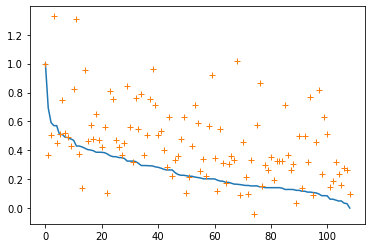

In [928]:
pyplot.plot(Y)
pyplot.plot(Wye,'+')


In [931]:
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, x_val, y_train, y_val):
    for epoch in range(1, n_epochs + 1):
        p_train = model(x_train) 
        loss_train = loss_fn(p_train, y_train)

        p_val = model(x_val) 
        loss_val = loss_fn(p_val, y_val)
        
        optimizer.zero_grad()
        loss_train.backward() 
        optimizer.step()

        if epoch == 1 or epoch % 10 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
seq_model = neu.Sequential(
            neu.Linear(6-1, 8),
            neu.Tanh(),
            neu.Linear(8, 1))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

In [942]:
#Traning set
X1_t = np.array(train.area)
X2_t = np.array(train.bedrooms)
X3_t = np.array(train.bathrooms)
X4_t = np.array(train.stories)
X5_t = np.array(train.parking)
X0_t= np.ones(436)
X = np.vstack([X0_t,X1_t,X2_t,X3_t,X4_t,X5_t])
X = X.T
X = np.array(X)   
x = scaler.fit_transform(X)
X_train= x
X_train= torch.tensor(X_train)
Y = np.array(train.price)
Y = Y.reshape(436,1)
y = scaler.fit_transform(Y)
Y_train = y
Y_train = torch.tensor(Y_train)

In [943]:
#--------------------------------------------------------------------#

#Test Set
X1_t = np.array(test.area)
X2_t = np.array(test.bedrooms)
X3_t = np.array(test.bathrooms)
X4_t = np.array(test.stories)
X5_t = np.array(test.parking)
X0_t= np.ones(109)
X = np.vstack([X0_t,X1_t,X2_t,X3_t,X4_t,X5_t])
X = X.T
X = np.array(X)   
x = scaler.fit_transform(X)
X_test= x
X_test= torch.tensor(X_test)
Y = np.array(test.price)
Y = Y.reshape(109,1)
y = scaler.fit_transform(Y)
Y_test = y
Y_test = torch.tensor(Y_test)

In [944]:
training_loop(n_epochs = 200, optimizer = optimizer, model = seq_model, loss_fn = neu.MSELoss(), 
              x_train = X_train, x_val = X_test, y_train = Y_train, y_val = Y_test)

RuntimeError: mat1 and mat2 must have the same dtype